<a href="https://colab.research.google.com/github/gmm39/CS4410_GMcKenzie/blob/main/Homework2_GMcKenzie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Gage McKenzie\
CS4410\
Homework 2

In [99]:
# Since this homework is a reimplementation of section 15.5 I will indicate
# which section of code matches which subsection of 15.5

# 15.5.1
from sklearn.datasets import load_diabetes
%matplotlib inline

In [100]:
diabetes = load_diabetes(scaled=False)

In [101]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [102]:
diabetes.data.shape

(442, 10)

In [103]:
diabetes.target.shape

(442,)

In [104]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [105]:
# 15.5.2
import pandas as pd

In [106]:
pd.set_option('display.precision', 4)

In [107]:
diabetesDF = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

In [108]:
diabetesDF['progression (1 year)'] = pd.Series(diabetes.target)

In [109]:
diabetesDF.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,progression (1 year)
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0,75.0
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0,141.0
3,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.0,4.8903,89.0,206.0
4,50.0,1.0,23.0,101.0,192.0,125.4,52.0,4.0,4.2905,80.0,135.0


In [110]:
diabetesDF.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,progression (1 year)
count,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000
mean,48.5181,1.4683,26.3758,94.6470,189.1403,115.4391,49.7885,4.0702,4.6414,91.2602,152.1335
std,13.1090,0.4996,4.4181,13.8313,34.6081,30.4131,12.9342,1.2904,0.5224,11.4963,77.0930
min,19.0000,1.0000,18.0000,62.0000,97.0000,41.6000,22.0000,2.0000,3.2581,58.0000,25.0000
25%,38.2500,1.0000,23.2000,84.0000,164.2500,96.0500,40.2500,3.0000,4.2767,83.2500,87.0000
50%,50.0000,1.0000,25.7000,93.0000,186.0000,113.0000,48.0000,4.0000,4.6200,91.0000,140.5000
75%,59.0000,2.0000,29.2750,105.0000,209.7500,134.5000,57.7500,5.0000,4.9972,98.0000,211.5000
max,79.0000,2.0000,42.2000,133.0000,301.0000,242.4000,99.0000,9.0900,6.1070,124.0000,346.0000


In [111]:
# 15.5.3
sampleDF = diabetesDF.sample(frac=0.1, random_state=17)

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

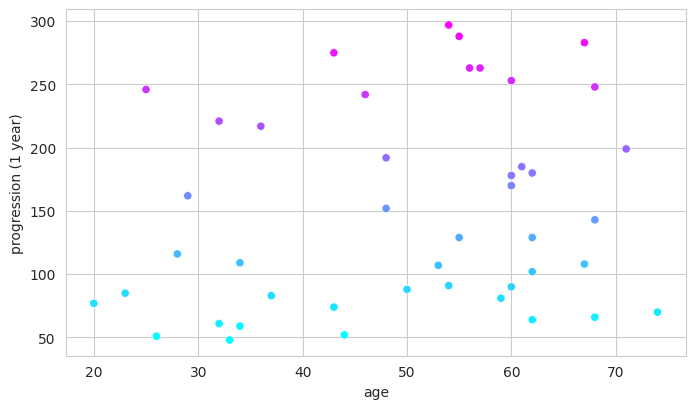

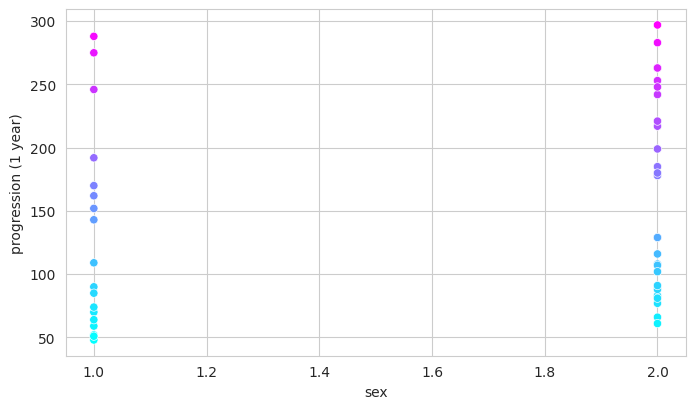

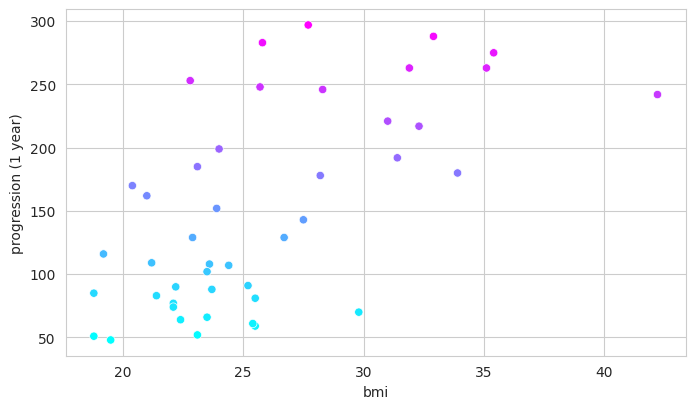

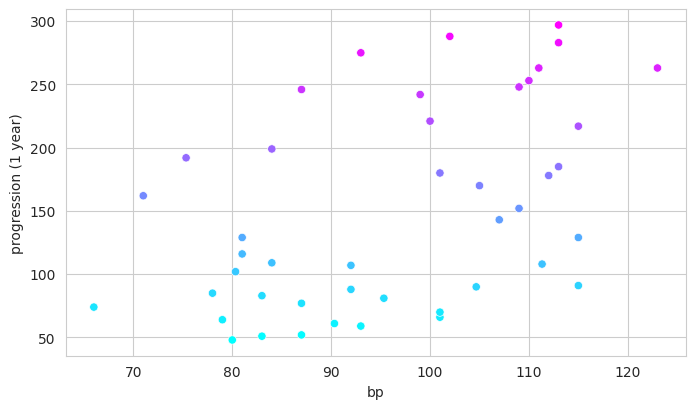

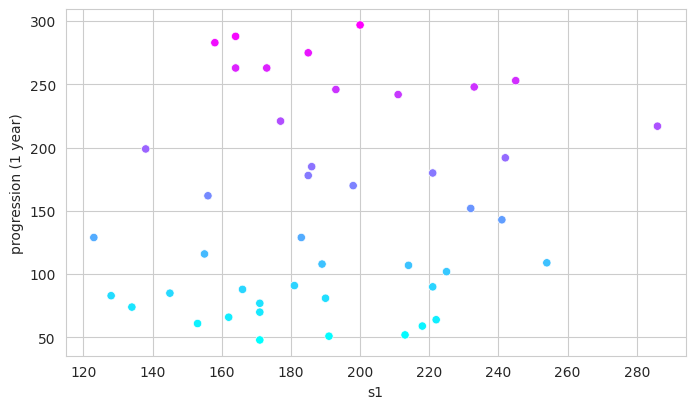

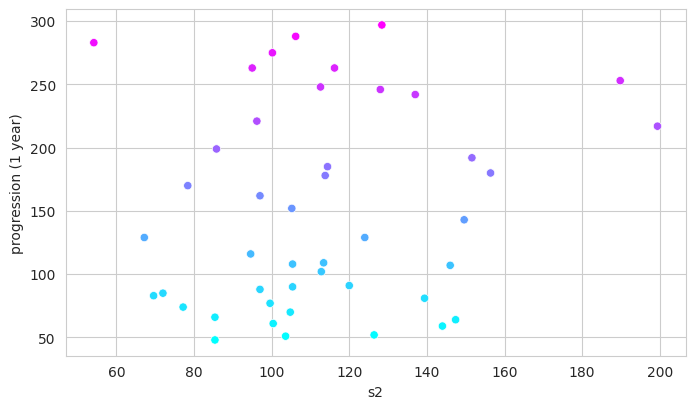

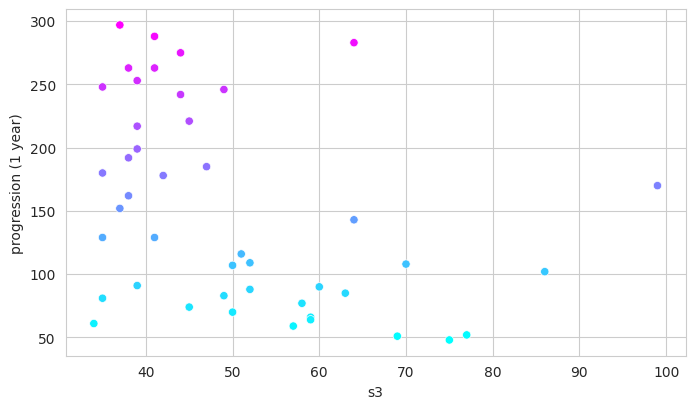

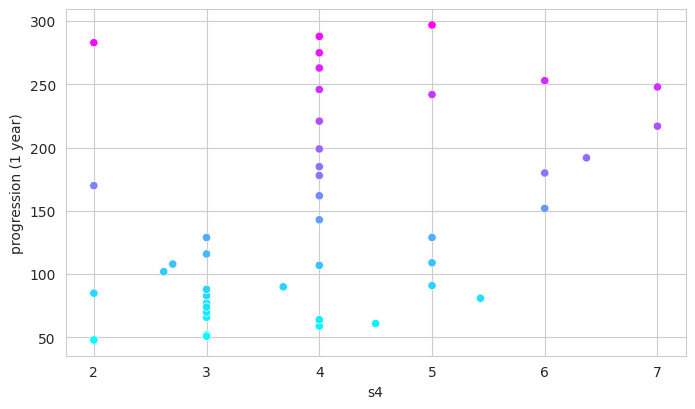

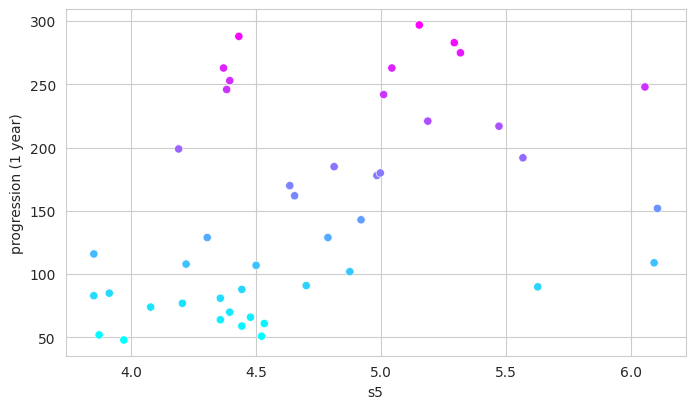

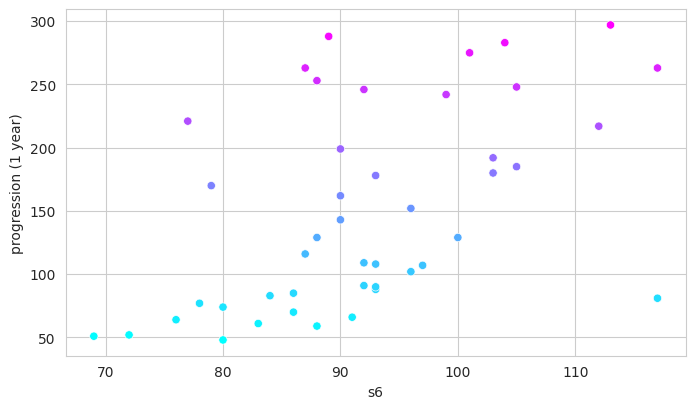

In [113]:
for feature in diabetes.feature_names:
  plt.figure(figsize=(8,4.5))
  sns.scatterplot(data=sampleDF, x=feature, y='progression (1 year)',
                  hue='progression (1 year)', palette='cool', legend=False)

In [114]:
# 15.5.4
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, random_state=11)

In [115]:
X_train.shape

(331, 10)

In [116]:
X_test.shape

(111, 10)

In [117]:
# 15.5.5
from sklearn.linear_model import LinearRegression

In [118]:
linear_regression = LinearRegression()

In [119]:
linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

In [120]:
for i, name in enumerate(diabetes.feature_names):
  print(f'{name:>10}: {linear_regression.coef_[i]}')

print(f'{"intercept":>10}: {linear_regression.intercept_}')

       age: -0.21875079007446366
       sex: -25.399153925226912
       bmi: 5.637640600609795
        bp: 1.0690516030902506
        s1: -0.46254234070692135
        s2: 0.21503794076694227
        s3: -0.48280715720259226
        s4: -0.04240805233353062
        s5: 56.72900990425518
        s6: 0.25045853252025907
 intercept: -249.03105144135895


In [121]:
# 15.5.6
predicted = linear_regression.predict(X_test)
expected = y_test

In [122]:
predicted[:5]

array([115.46474836,  83.4585369 , 160.77727376, 187.65710274,
        72.72122197])

In [123]:
expected[:5]

array([ 79.,  55., 109., 178.,  39.])

In [124]:
# 15.5.7
df = pd.DataFrame()

In [125]:
df['Expected'] = pd.Series(expected)

In [126]:
df['Predicted'] = pd.Series(predicted)

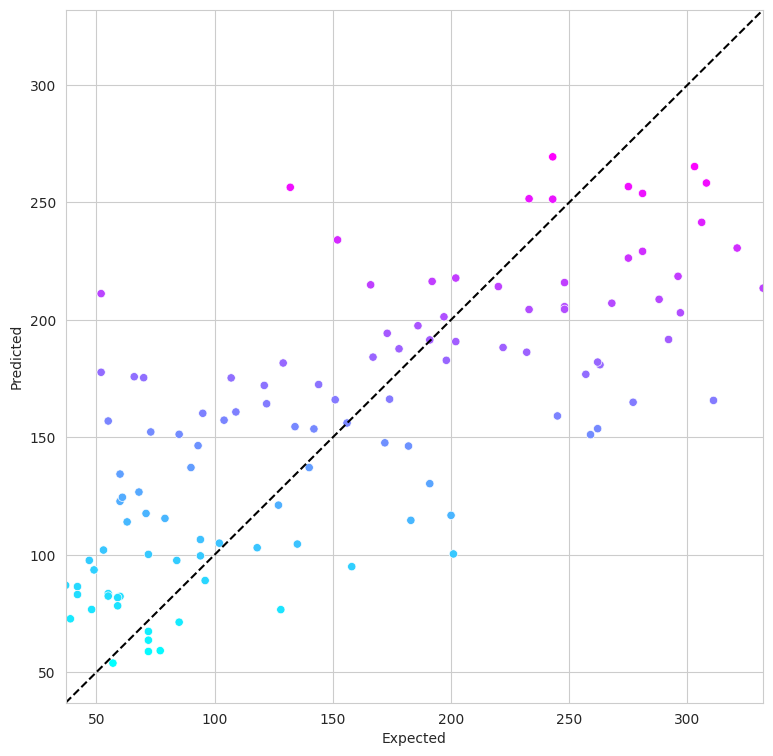

In [127]:
figure = plt.figure(figsize=(9,9))

axes = sns.scatterplot(data=df, x='Expected', y='Predicted',
                       hue='Predicted', palette='cool', legend=False)

start = min(expected.min(), predicted.min())
end = max(expected.max(), predicted.max())

axes.set_xlim(start, end)
axes.set_ylim(start, end)

line = plt.plot([start, end], [start, end], 'k--')

In [128]:
# 15.5.8
from sklearn import metrics

In [129]:
metrics.r2_score(expected, predicted)

0.5322429620529405

In [130]:
metrics.mean_squared_error(expected, predicted)

3458.230702517358

In [131]:
# 15.5.9
from sklearn.linear_model import ElasticNet, Lasso, Ridge

In [132]:
estimators = {
    'LinearRegression': linear_regression,
    'ElasticNet': ElasticNet(),
    'Lasso': Lasso(),
    'Ridge': Ridge()
}

In [133]:
from sklearn.model_selection import KFold, cross_val_score

In [134]:
for estimator_name, estimator_object in estimators.items():
  kfold = KFold(n_splits=10, random_state=11, shuffle=True)
  scores = cross_val_score(estimator=estimator_object, X=diabetes.data,
                           y=diabetes.target, cv=kfold, scoring='r2')
  print(f'{estimator_name:>16}: ' + f'mean of r2 scores={scores.mean():.3f}')

LinearRegression: mean of r2 scores=0.475
      ElasticNet: mean of r2 scores=0.452
           Lasso: mean of r2 scores=0.471
           Ridge: mean of r2 scores=0.475
